微分や微分方程式は、Sympy というライブラリを使うのが非常に便利です。Scipy もよく使われると思うけど、ちょっと使い方が難しい。

# Sympy を使った方法

In [1]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

指定した文字をシンボル（変数を表す文字）として扱います。

In [2]:
a, b, c, x, y = sym.symbols("a b c x y")

１個１個指定するときは次のような構文も可能です。

In [3]:
a = sym.Symbol('a')

指定した文字を関数として扱います。

In [4]:
f = sym.Function('f')
g = sym.Function('g')

## Sympy を使って数学の復習

In [5]:
# 数式は英語で numerial expression または numerical formula
expr = x**2-12*x+8
expr

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


どんな形の関数か確認したければこう。

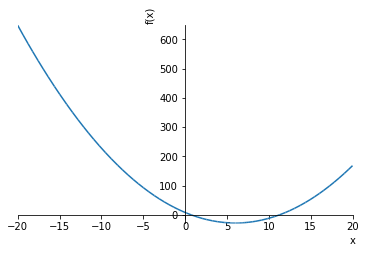

In [6]:
# 得られた関数を図示
plot(expr, (x, -20, 20))

In [7]:
# 等式は英語で equation または equality
eq = sym.Eq(expr)
eq

In [8]:
# このように右辺を明記しても良い
eq = sym.Eq(x**2-12*x, -8)
eq

In [9]:
# 方程式を解く
sym.solve(eq)

In [10]:
# 代数を使った式も取り扱える
eq = sym.Eq(a * x ** 2 + b * x + c)
eq

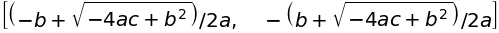

In [11]:
# xについて解く
sym.solve(eq, x)

In [12]:
# 因数分解
expr = x**2 + 2*x + 1
sym.factor(expr)

In [13]:
# 連立方程式
eq1 = 3 * x + 5 * y - 29
eq2 = x + y - 7

sym.solve([eq1, eq2])

## 微分

In [14]:
expr = 2 * x ** 2 + 5 * x - 3
expr

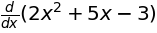

In [15]:
# 微分
sym.Derivative(expr)

In [16]:
# 微分を計算する
sym.Derivative(expr).doit()

In [17]:
# このように書いても同じ
sym.diff(expr)

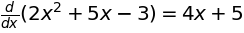

In [18]:
# sym.Eq を使って等式として表記
sym.Eq(sym.Derivative(expr), sym.diff(expr))

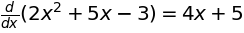

In [19]:
# 上と同じ意味だが、変数が１つだけなら上のように省略できる。
# 変数が２つ以上の場合は何で微分するか明記しなければいけない
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

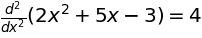

In [20]:
# ２階微分
sym.Eq(sym.Derivative(expr, x, 2), sym.diff(expr, x, 2))

In [21]:
# xについて微分して x=1を代入
sym.diff(expr).subs(x, 1)

In [22]:
# x について微分
expr = a * x ** 2 + b * x * y + c * y ** 2
sym.diff(expr, x)

In [23]:
# xについて微分して x=1を代入
sym.diff(expr, x).subs(x, 1)

### いろんな微分の公式

In [24]:
expr = x ** a
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

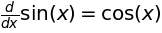

In [25]:
expr = sym.sin(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

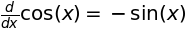

In [26]:
expr = sym.cos(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

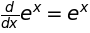

In [27]:
expr = sym.exp(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

In [28]:
expr = a**x
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

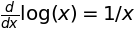

In [29]:
expr = sym.log(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

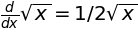

In [30]:
expr = sym.sqrt(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

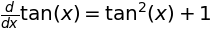

In [31]:
expr = sym.tan(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

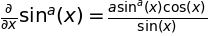

In [32]:
expr = sym.sin(x)**a
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

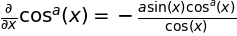

In [33]:
expr = sym.cos(x)**a
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

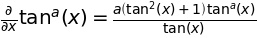

In [34]:
expr = sym.tan(x)**a
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

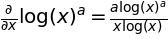

In [35]:
expr = sym.log(x)**a
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

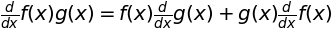

In [36]:
expr = f(x) * g(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

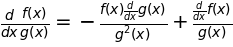

In [37]:
expr = f(x) / g(x)
sym.Eq(sym.Derivative(expr, x), sym.diff(expr, x))

## 常微分方程式 

### 2 f'(x) + 5 f(x) = 0 を解く

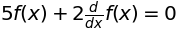

In [38]:
# 常微分方程式
eq = sym.Eq(2 * f(x).diff(x,1) + 5 * f(x))
eq

In [39]:
# 一般解
ans = sym.dsolve(eq)
print(ans)
ans

Eq(f(x), C1*exp(-5*x/2))


In [40]:
# 特殊解
ans = sym.dsolve(eq, ics={f(0):1})
print(ans)
ans

Eq(f(x), exp(-5*x/2))


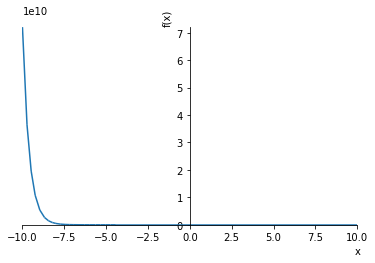

In [41]:
plot(ans.rhs, (x, -10, 10)) # rhs は右辺(Right-hand side)の意味

In [42]:
# 特殊解で x = 2 のとき
print(ans.subs(x, 2))
ans.subs(x, 2)

Eq(f(2), exp(-5))


Sympy ではこれ以上展開してくれる（小数表示にしてくれる）方法が見つからなかったので、とりあえず numpyなどから関数を借りてきて次のように計算してみました。

In [43]:
# 小数表示
from numpy import sqrt, sin, cos, tan, log, exp
exp(-5)

### f''(x) + f'(x) + 4 f(x) = 0

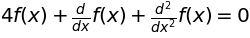

In [44]:
# 常微分方程式
eq = sym.Eq(f(x).diff(x,2) + f(x).diff(x,1) + 4 * f(x))
eq

Eq(f(x), (C1*sin(sqrt(15)*x/2) + C2*cos(sqrt(15)*x/2))/sqrt(exp(x)))


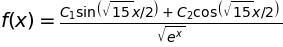

In [45]:
# 一般解
ans = sym.dsolve(eq)
print(ans)
ans

Eq(f(x), (sqrt(15)*sin(sqrt(15)*x/2)/5 + cos(sqrt(15)*x/2))/sqrt(exp(x)))


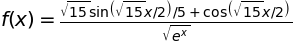

In [46]:
# 特殊解
ans = sym.dsolve(eq, ics={f(0):1, f(x).diff(x,1).subs(x, 0):1})
print(ans)
ans

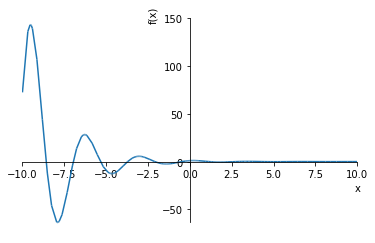

In [47]:
plot(ans.rhs, (x, -10, 10)) # rhs は右辺(Right-hand side)の意味

In [48]:
# 特殊解に x = 2 を代入
ans2 = ans.subs(x, 2)
print(ans2)
ans2

Eq(f(2), (cos(sqrt(15)) + sqrt(15)*sin(sqrt(15))/5)*exp(-1))


In [49]:
# 小数表示
from numpy import sqrt, sin, cos, tan, log, exp
(cos(sqrt(15)) + sqrt(15)*sin(sqrt(15))/5)*exp(-1)

### f'(x) + 0.2 f(x) = 0 を解く, ただし f(0) = 5

In [50]:
eq = sym.Eq(f(x).diff(x,1) + 0.2 * f(x))
ans = sym.dsolve(eq, ics={f(0):5})
print(ans)
ans

Eq(f(x), 5*exp(-0.2*x))


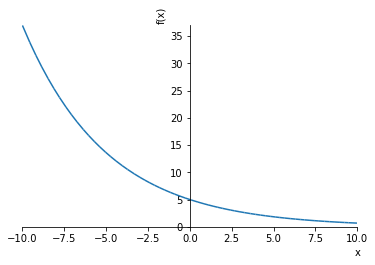

In [51]:
plot(ans.rhs, (x, -10, 10)) # rhs は右辺(Right-hand side)の意味

### f'(x) + 0.2 x = 0 を解く, ただし f(0) = 5

In [52]:
eq = sym.Eq(f(x).diff(x,1) + 0.2 * x)
ans = sym.dsolve(eq, ics={f(0):5})
print(ans)
ans

Eq(f(x), -0.1*x**2 + 5)


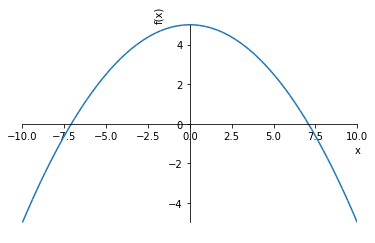

In [53]:
plot(ans.rhs, (x, -10, 10)) # rhs は右辺(Right-hand side)の意味

### f'(x) + f(x)/x - 2 を解く, ただし f(1) = 2

In [54]:
eq = sym.Eq(f(x).diff(x,1) + f(x)/x - 2)
ans = sym.dsolve(eq, ics={f(1):2})
print(ans)
ans

Eq(f(x), x + 1/x)


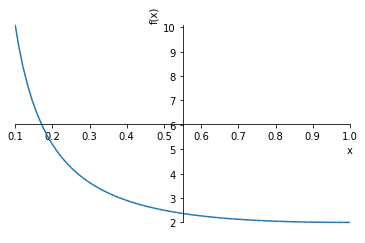

In [55]:
plot(ans.rhs, (x, 0.1, 1)) # rhs は右辺(Right-hand side)の意味

# Scipy.integrate.odeint を使う方法

インターネットで検索すると使用例がいくつか見つかります。たとえば：
https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

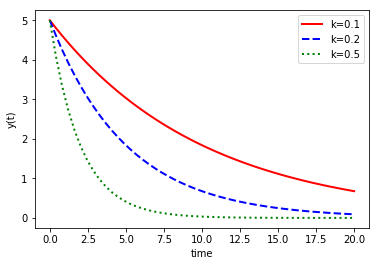

In [56]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# 微分方程式の数値解法

## Euler法
## Runge-Kutta法